# Simple Linear Regression

In this notebook, we study a simple linear regression. First, we construct a linear predictor function without scikit learn and then we use scikit learn. We will see these two results are the same.

The example is coming from 
<a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic regression in Wikipedia</a>.

The table indicates the number of hours twenty students spent studying for an exam and whether or not they passed (1) or faild (0).

# Without Scikit Learn

In [1]:
import pandas as pd
df = pd.DataFrame({
    'Hours': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5],
    'Result': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]})
df

,Hours,Result
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


The following is the graph.

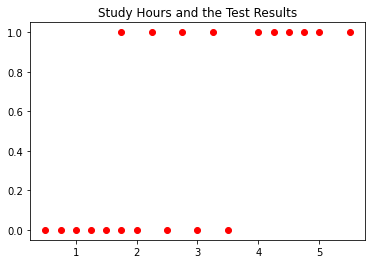

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['Hours'], df['Result'], 'ro')
plt.title("Study Hours and the Test Results")
plt.show()

We will construct a linear predictor function y = b_1 * x + b_0 using the method of least squares.
First, we compute b_1. We do not want to modify the original data frame. So we will use a copy.

In [3]:
def copying(data):
    return data.copy()

In [4]:
def coefficient(data):
    data['numerator'] = (data['Hours']-df['Hours'].mean())*(data['Result']-df['Result'].mean())
    data['denominator'] = ((data['Hours']-df['Hours'].mean())**2)
    return data['numerator'].sum()/data['denominator'].sum()

In [5]:
df.pipe(copying).pipe(coefficient)

0.23459561219317931

We compute b_0.

In [6]:
def intercept(beta=0.2346):
    return df['Result'].mean()-(beta*df['Hours'].mean())

In [7]:
intercept(beta=0.2346)

-0.15394750000000001

The linear predictor function is
y = 0.2346 * x - 0.1539. The following is the graph.

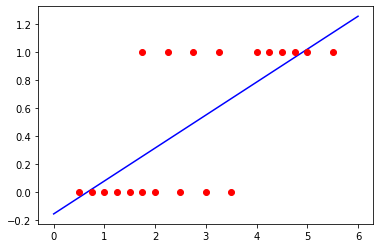

In [8]:
import numpy as np

x = np.linspace(0,6,10)
y = 0.2346 * x - 0.1539 

plt.plot(x,y, 'b')
plt.plot(df['Hours'], df['Result'], 'ro')
plt.show()

# With Scikit Learn

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [11]:
print(regressor.coef_)

[0.23459561]


In [12]:
print(regressor.intercept_)

-0.15393526898848708
